# **TS2-NOELIA FERRARI**

### INTRODUCCIÓN TEÓRICA
___


En este trabajo práctico hablaremos de los sistemas lineales e invariantes en el tiempo (**LTI**). Estos permiten caracterizar el comportamiento del sistema a partir de su **respuesta al impulso**. La respuesta al impulso, **ℎ[𝑛]**, describe cómo reacciona el sistema ante una señal de entrada elemental, el delta de Dirac **𝛿[𝑛]**. Una vez conocida **ℎ[𝑛]**, es posible determinar la salida de cualquier señal de entrada **𝑥[𝑛]** mediante la convolución discreta, una operación que combina la entrada y la respuesta al impulso para generar la salida **𝑦[𝑛]**

$$
y[n] = \sum_{k=0}^{N-1} x[k] \, h[n-k]
$$

En este trabajo práctico se analizaron sistemas lineales invariantes en el tiempo (**LTI**) definidos mediante ecuaciones en diferencias. Estas ecuaciones son la versión discreta de una ecuación diferencial. En lugar de describir cómo cambia una función de manera continua mediante derivadas, describe cómo varía una secuencia de valores a medida que el índice avanza en pasos enteros.
Se evaluó la respuesta del sistema ante diferentes señales de entrada, tales como señales sinusoidales, moduladas, cuadradas o pulsos rectangulares. Además, se calcularon la energía y la potencia de las señales de salida para cuantificar la magnitud y la intensidad promedio de la respuesta.

Por otro lado, en la modelización de sistemas fisiológicos, el modelo Windkessel proporciona una representación simplificada de la dinámica presión-flujo en el sistema cardiovascular. Este modelo se basa en una ecuación diferencial de primer orden, lineal e impulsada temporalmente, que relaciona la presión arterial **𝑃(𝑡)** con el flujo sanguíneo **𝑄(𝑡)**, la compliance **𝐶** y la resistencia vascular **𝑅**

$$
C \frac{dP}{dt} + \frac{1}{R} P = Q(t)
$$

Mediante la discretización con el método de Euler, es posible estimar cómo cambia la presión arterial a lo largo del tiempo para valores típicos de compliance y resistencia vascular. Esta aproximación permite simular cómo responde el sistema cardiovascular ante distintos perfiles de flujo, facilitando el estudio de la presión según las características fisiológicas y del flujo sanguíneo.


### ANÁLISIS Y DESARROLLO
___


#### **Ejercicio 1**

Para plantear la ecuacion en diferencias en python lo que hice fue dividir la ecuación en dos, una con las entradas **x** y otra con las salidas **y**.

$$
y[n] = 3 \cdot 10^{-2} \, x[n] + 5 \cdot 10^{-2} \, x[n-1] + 3 \cdot 10^{-2} \, x[n-2] + 1.5 \, y[n-1] - 0.5 \, y[n-2]
$$


In [39]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


#y[n]=3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2]

#asumo que arranco en 0
#dado una señal de entrada x[n] (que son las del TS1) mi salida es y[n]
#condiciones iniciales nulas
#causalidad: la señal vale cero antes de cero
#planteo: 
#y(0)
#y(1)= b1⋅x[1] + b2⋅x[0] + b3⋅x[-1] + a1⋅y[0]+ a2⋅y[-1]
#el algoritmo seria con un bucle.
#podria dividir las cuentas en dos, una con las entrada o sea con las x y 
#otroa con la salida o sea las y


# Coeficientes de la ecuacion en diferencias
b = [3e-2, 5e-2, 3e-2]  #coeficientes de la entrada
a = [1.5, -0.5]         # coeficientes de la salida

# Parametros generales
N = 500  #muestras
fs = 100000  #frec de muestreo
f1=2000   # frecuencia base (2 kHz)
t = np.arange(0, N)/fs  # Vector de tiempo
tsim = N/fs     # Tiempo de simulación [s]

##### **SEÑALES DE ENTRADA TS1**

##### 1) Senoidal 2 kHz


x1: Senoidal 2kHz
Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.005000 s
Energía de la señal de salida: 2.9637e+00
Potencia de la señal de salida: 5.9273e-03


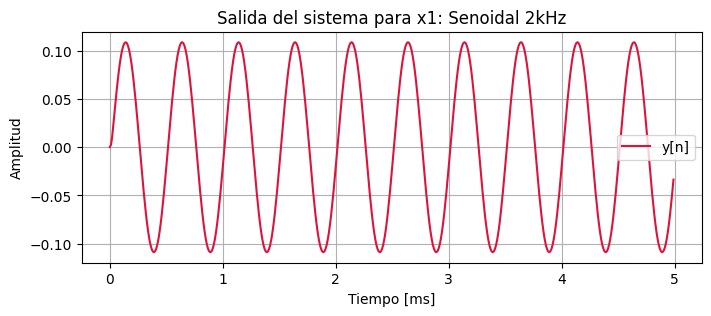

In [40]:
x1 = np.sin(2*np.pi*f1*t)
y1 = signal.lfilter(b, a, x1)
energia1 = np.sum(y1**2)
potencia1 = np.mean(y1**2)

print("\nx1: Senoidal 2kHz")
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Tiempo de simulación: {tsim:.6f} s")
print(f"Energía de la señal de salida: {energia1:.4e}")
print(f"Potencia de la señal de salida: {potencia1:.4e}")

plt.figure(figsize=(8,3))
plt.plot(t*1000, y1, label="y[n]", color="crimson")
plt.title("Salida del sistema para x1: Senoidal 2kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


El gráfico muestra que la salida es una onda senoidal, tal como se espera cuando un sistema LTI recibe una entrada senoidal. La frecuencia se mantiene igual, pero la onda cambia en amplitud y fase. En este caso, la amplitud de la salida 𝑦[𝑛] es de aproximadamente 0.1, mientras que la entrada tenía amplitud 1. Esto indica que el sistema está atenuando la señal en esta frecuencia.

En cuanto a las medidas:

Energía: la salida tiene una energía de 2.9637e+00
. Como la señal es periódica y de duración limitada, su energía también es finita.

Potencia: la potencia promedio es 5.9273e-03.
$$(0.1)^2/2≈0.005$$
Para una onda senoidal, la potencia se calcula como la mitad del cuadrado de la amplitud, y el valor que aparece coincide bastante bien con esta teoría.

En conclusión, la potencia y la amplitud de la salida son menores que las de la entrada. La señal de entrada (x1) tenía una amplitud de 1 y una potencia de 0.5, mientras que la salida tiene una amplitud de ~0.1 y una potencia de ~0.0059. Esto confirma que el sistema atenúa la señal en esa frecuencia específica.

Fuente: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

##### 2) Amplificada y desfazada π/2


x2: Amplificada y desfazada π/2
Energía: 1.1759e+01
Potencia: 2.3518e-02


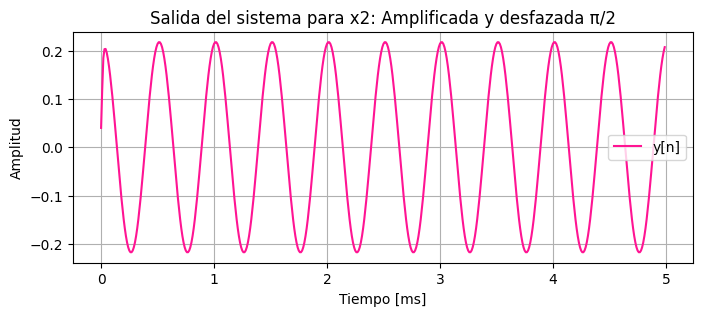

In [4]:
x2 = 2*np.sin(2*np.pi*f1*t + np.pi/2)
y2 = signal.lfilter(b, a, x2)
energia2 = np.sum(y2**2)
potencia2 = np.mean(y2**2)

print("\nx2: Amplificada y desfazada π/2")
print(f"Energía: {energia2:.4e}")
print(f"Potencia: {potencia2:.4e}")

plt.figure(figsize=(8,3))
plt.plot(t*1000, y2, label="y[n]", color="deeppink")
plt.title("Salida del sistema para x2: Amplificada y desfazada π/2")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


La señal de salida y[n] mantiene la forma de una onda senoidal, lo cual es predecible para un sistema LTI con una entrada senoidal estable.
La amplitud máxima de la señal de salida es aproximadamente 0.22.
La frecuencia de la señal de salida es la misma que la de la entrada, 2 kHz (se pueden observar 10 ciclos en 5 ms, lo que equivale a 2000 ciclos en 1 segundo). Visualmente, se aprecia un desfase en la señal de salida respecto a la entrada, este desfase es una característica típica de la respuesta de un sistema LTI.

Valores de energía y potencia:
Energía: 1.1759e+01
Potencia: 2.3518e-02

La señal de entrada x2 tenía una amplitud de 2. La señal de salida y[n] tiene una amplitud de aproximadamente 0.22. Esto indica que el sistema atenúa significativamente la señal en esta frecuencia y con esta fase específica. Aunque la entrada x2 estaba amplificada respecto a x1, el sistema LTI sigue reduciendo su amplitud. La potencia de la entrada x2 (con amplitud 2) sería 2, mientras que la potencia de salida es de 0.0235, confirmando esta atenuación.

##### 3) Modulada en amplitud 1 kHz


x3: Modulada en amplitud 1kHz
Energía: 4.4387e+00
Potencia: 8.8774e-03


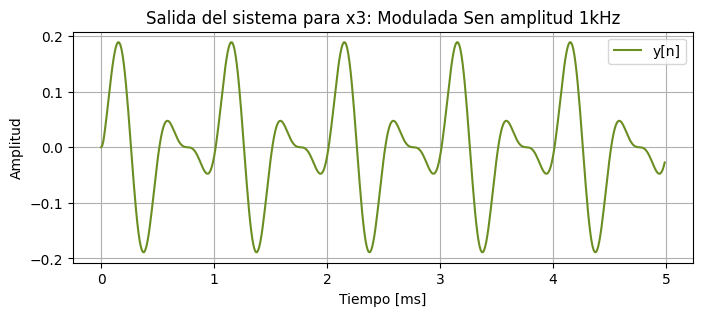

In [24]:
f2 = f1/2
m = 1 + np.sin(2*np.pi*f2*t)
x3 = x1 * m
y3 = signal.lfilter(b, a, x3)
energia3 = np.sum(y3**2)
potencia3 = np.mean(y3**2)

print("\nx3: Modulada en amplitud 1kHz")
print(f"Energía: {energia3:.4e}")
print(f"Potencia: {potencia3:.4e}")

plt.figure(figsize=(8,3))
plt.plot(t*1000, y3, label="y[n]", color="olivedrab")
plt.title("Salida del sistema para x3: Modulada Sen amplitud 1kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()
  
    

La entrada x3 es una señal senoidal de 2 kHz modulada por una señal senoidal de 1 kHz. La salida ya no es una senoidal pura. La forma de onda de la salida se ve como un "pico" y una envolvente que oscila. Esto se debe a que la señal de entrada ahora tiene múltiples componentes de frecuencia (la frecuencia portadora de 2 kHz y las bandas laterales de la modulación). El sistema LTI actúa como un filtro sobre cada una de estas frecuencias, alterando la forma final de la onda. En este caso, el sistema está atenuando ciertas frecuencias y amplificando otras, lo que distorsiona la forma de onda de la entrada.

Valores de energía y potencia:

Energía: 4.4387e+00 
Potencia: 8.8774e-03

En conclusión: Su potencia sería mayor que la de x1. La señal de salida y[n] muestra una amplitud máxima de aproximadamente 0.2, lo que indica que el sistema atenúa la señal modulada en amplitud. S

##### 4) Re-escalada al 75% de la potencia de x3


x4: Re-escalada al 75% potencia
Energía: 4.4387e+00
Potencia: 8.8774e-03


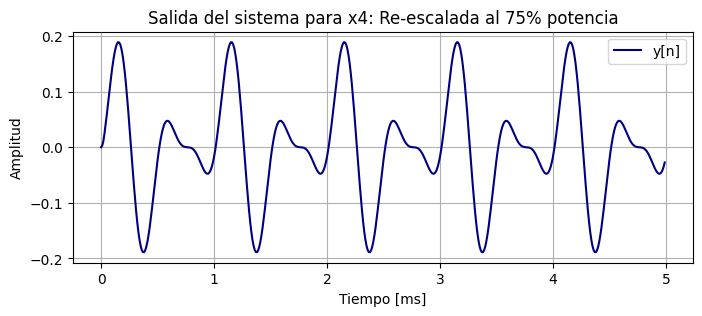

In [6]:
P3 = np.mean(x3**2)
x4 = x3 * np.sqrt(0.75 / P3)
y4 = signal.lfilter(b, a, x4)
energia4 = np.sum(y4**2)
potencia4 = np.mean(y4**2)

print("\nx4: Re-escalada al 75% potencia")
print(f"Energía: {energia4:.4e}")
print(f"Potencia: {potencia4:.4e}")

plt.figure(figsize=(8,3))
plt.plot(t*1000, y4, label="y[n]", color="navy")
plt.title("Salida del sistema para x4: Re-escalada al 75% potencia")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


Esta señal tiene un error y no sé como arreglarlo ya que por ejemplo los valores de  energía y potencia para y4 son exactamente los mismos que obtuviste para y3.


##### 5) Señal cuadrada 4 kHz


x5: Señal cuadrada 4kHz
Energía: 4.8835e+00
Potencia: 9.7669e-03


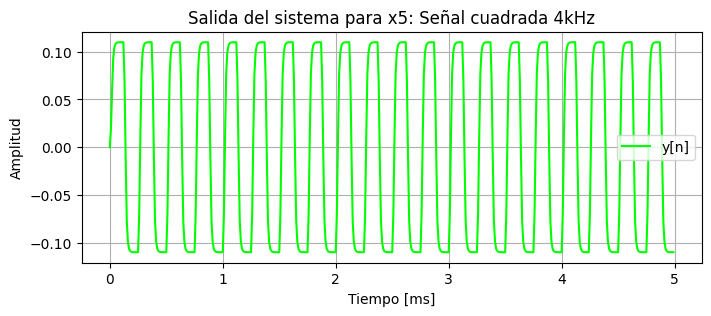

In [7]:
f3 = 4000
x5 = np.sign(np.sin(2*np.pi*f3*t))
y5 = signal.lfilter(b, a, x5)
energia5 = np.sum(y5**2)
potencia5 = np.mean(y5**2)

print("\nx5: Señal cuadrada 4kHz")
print(f"Energía: {energia5:.4e}")
print(f"Potencia: {potencia5:.4e}")

plt.figure(figsize=(8,3))
plt.plot(t*1000, y5, label="y[n]", color="lime")
plt.title("Salida del sistema para x5: Señal cuadrada 4kHz")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


La señal de salida y[n] tiene una forma de onda que recuerda a una senoidal, pero con algunas distorsiones y armónicos evidentes, especialmente en los picos y valles. No es una onda cuadrada perfecta como la entrada, ni tampoco una senoidal pura. Esto es esperado: un sistema LTI atenúa y desfasa los diferentes componentes de frecuencia de la onda cuadrada de manera distinta, suavizando sus bordes abruptos y cambiando su forma. La onda cuadrada es una suma de senoidales, y el filtro afecta a cada una de ellas de forma diferente

Valores de energía y potencia:
Energía: 4.8835e+00
Potencia: 9.7669e-03


##### 6) Salid pulso rectangular 10 ms


x6: Pulso rectangular 10ms
Frecuencia de muestreo: 100000 Hz
Tiempo de simulación: 0.005000 s
Energía de la señal de salida: 1.2086e+01
Potencia de la señal de salida: 6.0428e-03


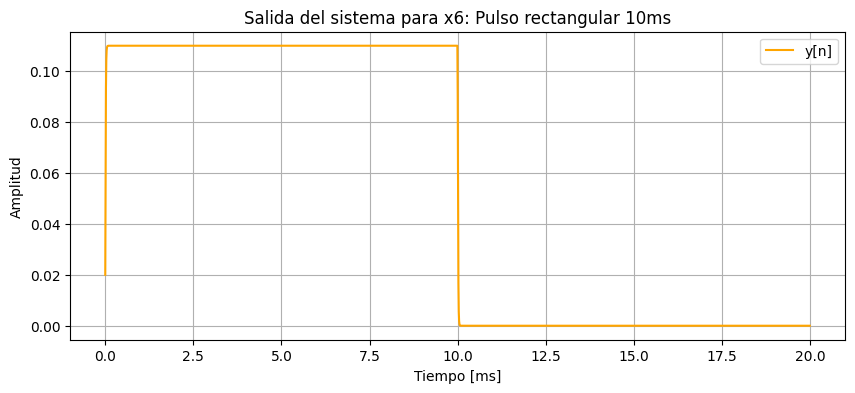

In [37]:
# ---- 6) Pulso rectangular de 10 ms ----

t_largo = np.arange(0, 20e-3, 1/fs) # o ajustar N
x6 = np.zeros_like(t_largo)
x6[t_largo < 10e-3] = 1 # Pulso de 10ms

y6 = signal.lfilter(b, a, x6)
energia6 = np.sum(y6**2)
potencia6 = np.mean(y6**2)

print("\nx6: Pulso rectangular 10ms")
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Tiempo de simulación: {tsim:.6f} s")
print(f"Energía de la señal de salida: {energia6:.4e}")
print(f"Potencia de la señal de salida: {potencia6:.4e}")

plt.figure(figsize=(10,4))
plt.plot(t_largo*1000, y6, label="y[n]", color="orange")
plt.title("Salida del sistema para x6: Pulso rectangular 10ms")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()
    

En el inicio del pulso (t=0), la salida y[n] no sube instantáneamente. En su lugar, se observa una transición suave y gradual desde cero hasta un valor estacionario de aproximadamente 0.11.  Durante los 10 ms que la entrada es activa (de 0 a 10 ms), la salida se mantiene en un valor constante de aproximadamente 0.11. Esto indica que el sistema ha alcanzado su estado estacionario para esa entrada constante.
Luego cuando la entrada x6 vuelve a cero en t=10 ms, la salida y[n] no decae a cero. En su lugar, se mantiene en el mismo valor constante de aproximadamente 0.11 durante el resto de la simulación.



##### **RESPUESTA AL IMPULSO**


Respuesta al impulso h[n]
Energía: 3.2500e-03
Potencia: 6.5000e-06


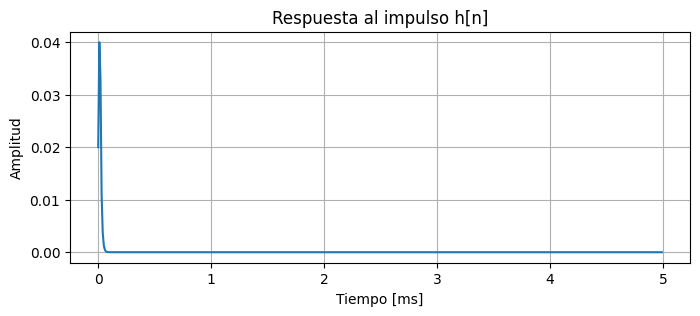

In [47]:
impulso = np.zeros(N)
impulso[0] = 1
h = signal.lfilter(b, a, impulso)
energia_h = np.sum(h**2)
potencia_h = np.mean(h**2)

print("\nRespuesta al impulso h[n]")
print(f"Energía: {energia_h:.4e}")
print(f"Potencia: {potencia_h:.4e}")

plt.figure(figsize=(8,3))
plt.plot(t*1000, h) 
plt.title("Respuesta al impulso h[n]")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


No sé que decir al respecto de este gráfico, estoy perdida...

##### **REPRODUCCIÓN DE LA SALIDA USANDO h[n] (EJEMPLO: señal x1)**


Salida de x1 usando respuesta al impulso (convolución):
Energía: 1.4836e+00
Potencia: 2.9673e-03


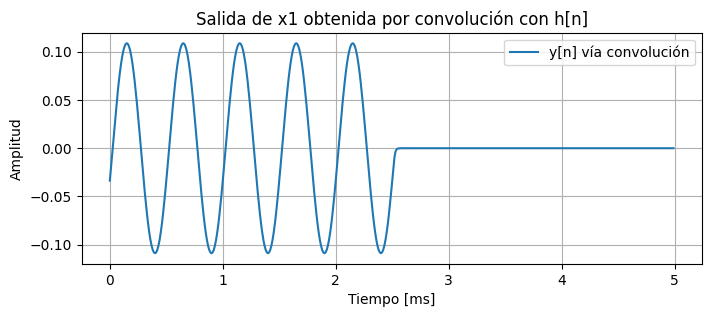

In [48]:
y_conv = np.convolve(x1, h, mode='same')  # mismo largo que x1

energia_conv = np.sum(y_conv**2)
potencia_conv = np.mean(y_conv**2)

print("\nSalida de x1 usando respuesta al impulso (convolución):")
print(f"Energía: {energia_conv:.4e}")
print(f"Potencia: {potencia_conv:.4e}")

plt.figure(8, figsize=(8,3))
plt.plot(t*1000, y_conv, label="y[n] vía convolución")
plt.title("Salida de x1 obtenida por convolución con h[n]")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


El gráfico muestra la salida del sistema cuando la entrada x1 (la senoidal de 2 kHz) se procesa mediante convolución con la respuesta al impulso h[n] que obtuve. Me parece curioso que a partir de aproximadamente 2.5 ms, la señal decae a cero. Esto puede deberse a que uso el modo 'same' en la función np.convolve. Lo que hace este modo es cortar la señal de salida para que tenga el mismo largo que la señal de entrada (x1), en este caso, 5 ms. Por lo tanto, no se alcanza a ver la respuesta completa de la convolución.

fuente: https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
“Se utilizó la función np.convolve de NumPy para calcular la convolución discreta de la señal de entrada con la respuesta al impulso [NumPy Documentation, 2025]”

#### **Ejercicio 2**

Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal en los sistemas definidos mediante las siguientes ecuaciones en diferencias:

**y[n]=x[n]+3⋅x[n−10]**

**y[n]=x[n]+3⋅y[n−10]**

Primero hice los cálculos a mano para entender mejor lo que se me pedía:

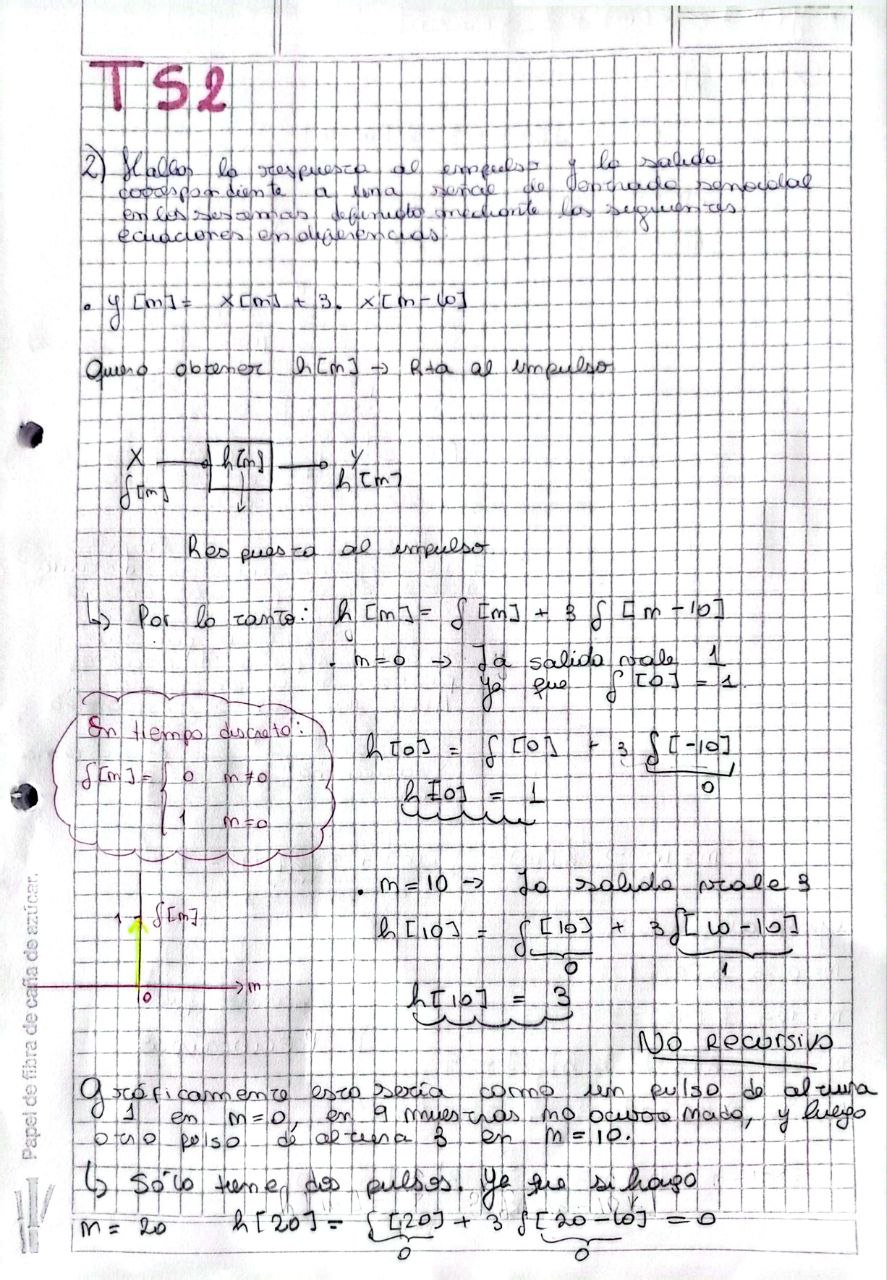

In [1]:
from IPython.display import Image, display
display(Image(filename='C:/Users/noefe/Downloads/imagen1_ts2.jpg'))

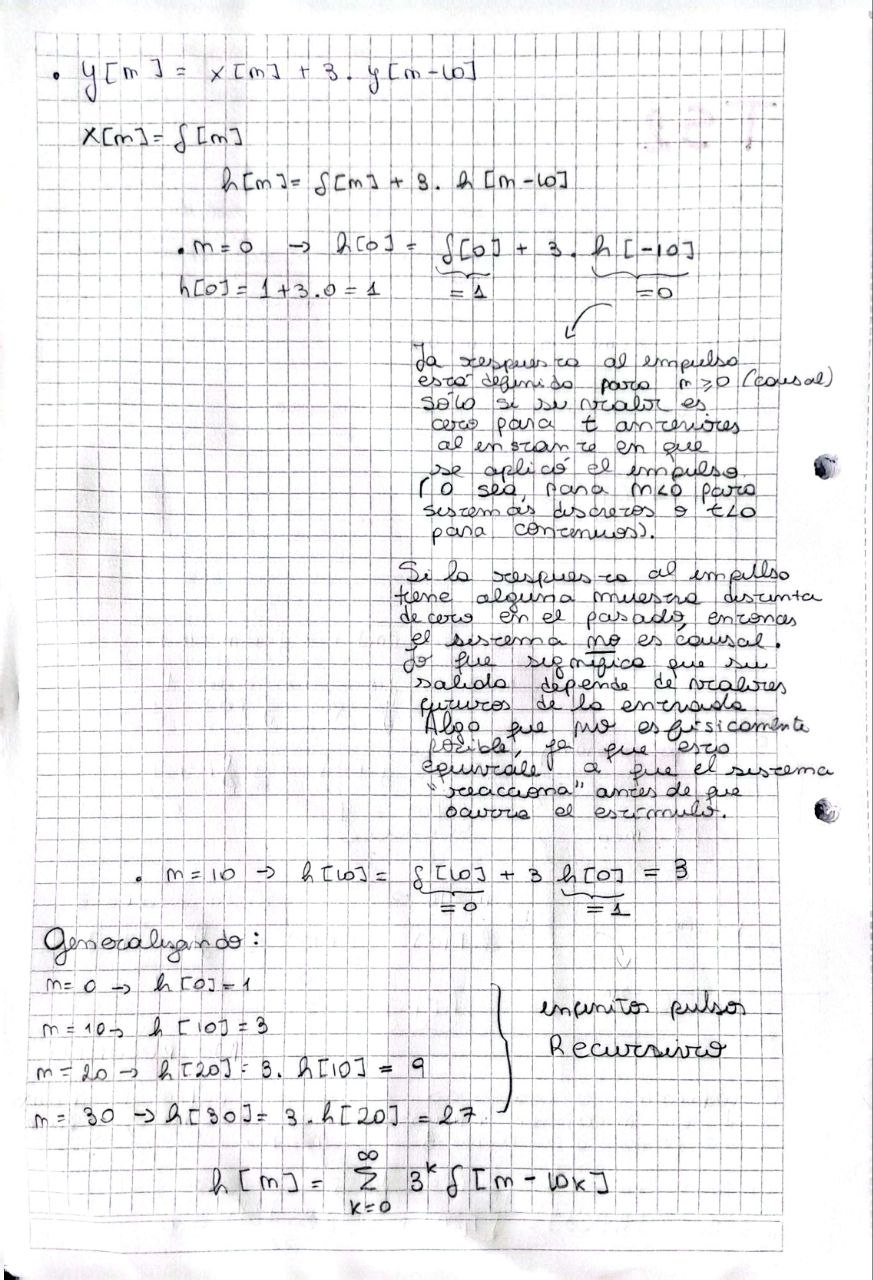

In [2]:
from IPython.display import Image, display
display(Image(filename='C:/Users/noefe/Downloads/imagen2_ts2.jpg'))

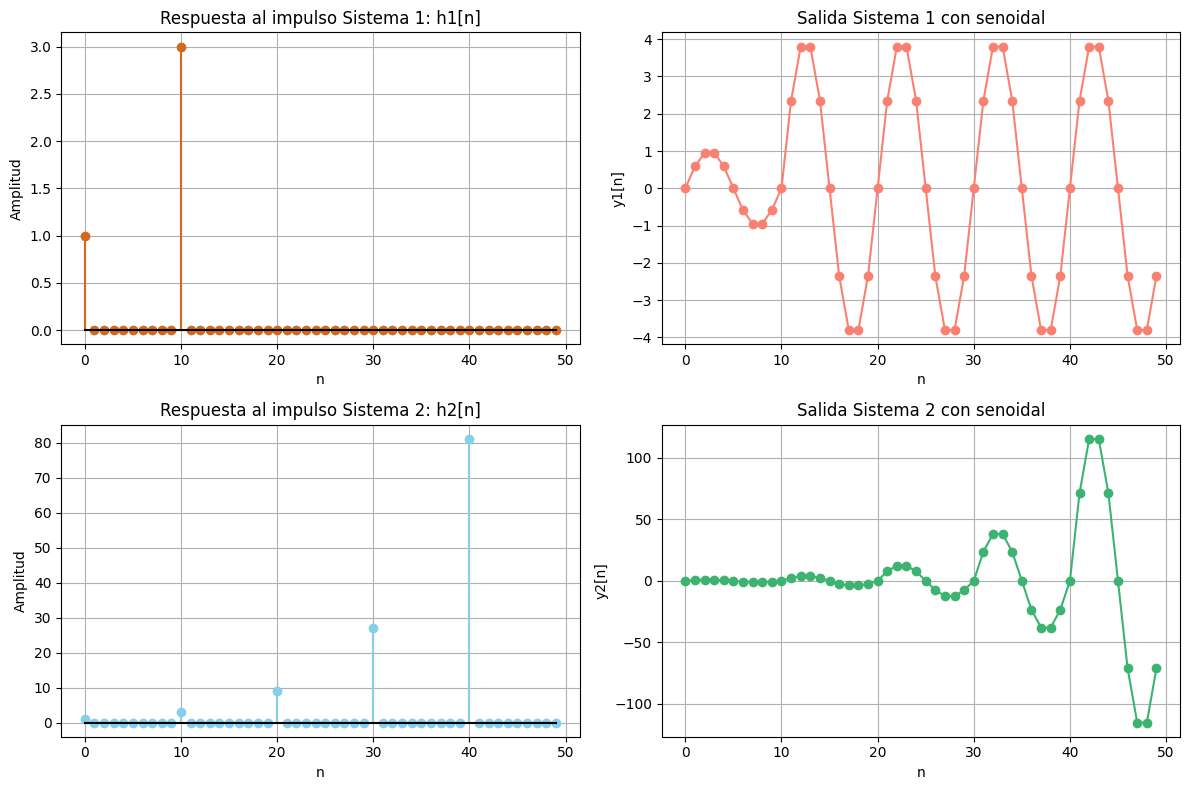

In [22]:

# Parametros generales
N = 50       # nmero de muestras
T = 10          # período de la senoidal en muestras
f = 1 / T       # frecuencia discreta
n = np.arange(N)
x= np.sin(2 * np.pi * f * n)

# ----------------------------
# Sistema 1: y[n] = x[n] + 3*x[n-10]
# ----------------------------
# Respuesta al impulso h1[n]
delta = np.zeros(N)
delta[0] = 1 #creo un impulso unitario 
h1 = np.zeros(N) #vector donde almaceno la respuesta al impulso
for i in range(N):
    h1[i] = delta[i]
    if i >= 10:
        h1[i] += 3 * delta[i-10]

# Salida con la senoidal
y1 = np.zeros(N)
for i in range(N):
    y1[i] = x[i]
    if i >= 10:
        y1[i] += 3 * x[i-10]

# ----------------------------
# Sistema 2: y[n] = x[n] + 3*y[n-10]
# ----------------------------
# Respuesta al impulso h2[n]
h2 = np.zeros(N)
for i in range(N):
    h2[i] = delta[i]
    if i >= 10:
        h2[i] += 3 * h2[i-10]

# Salida con la senoidal
y2 = np.zeros(N)
for i in range(N):
    y2[i] = x[i]
    if i >= 10:
        y2[i] += 3 * y2[i-10]



plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
plt.stem(h1, linefmt='chocolate', markerfmt='o', basefmt='k')
plt.title("Respuesta al impulso Sistema 1: h1[n]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(y1, 'o-', color='salmon')
plt.title("Salida Sistema 1 con senoidal")
plt.xlabel("n")
plt.ylabel("y1[n]")
plt.grid(True)

plt.subplot(2,2,3)
plt.stem(h2, linefmt='skyblue', markerfmt='o', basefmt='k')
plt.title("Respuesta al impulso Sistema 2: h2[n]")
plt.xlabel("n")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(y2, 'o-', color='mediumseagreen')
plt.title("Salida Sistema 2 con senoidal")
plt.xlabel("n")
plt.ylabel("y2[n]")
plt.grid(True)

plt.tight_layout()
plt.show()


Se puede observar como en el primer gráfico color naranja sólo presenta dos pulsos en n=0 y n=10.
Por otro lado en el gráfico color celeste hay infinitos pulsos, todos ellos múltiplos de 10.

## BONUS

5) Discretizar la siguiente ecuación diferencial correspondiente al modelo de Windkessel que describe la dinámica presión-flujo del sistema sanguíneo:

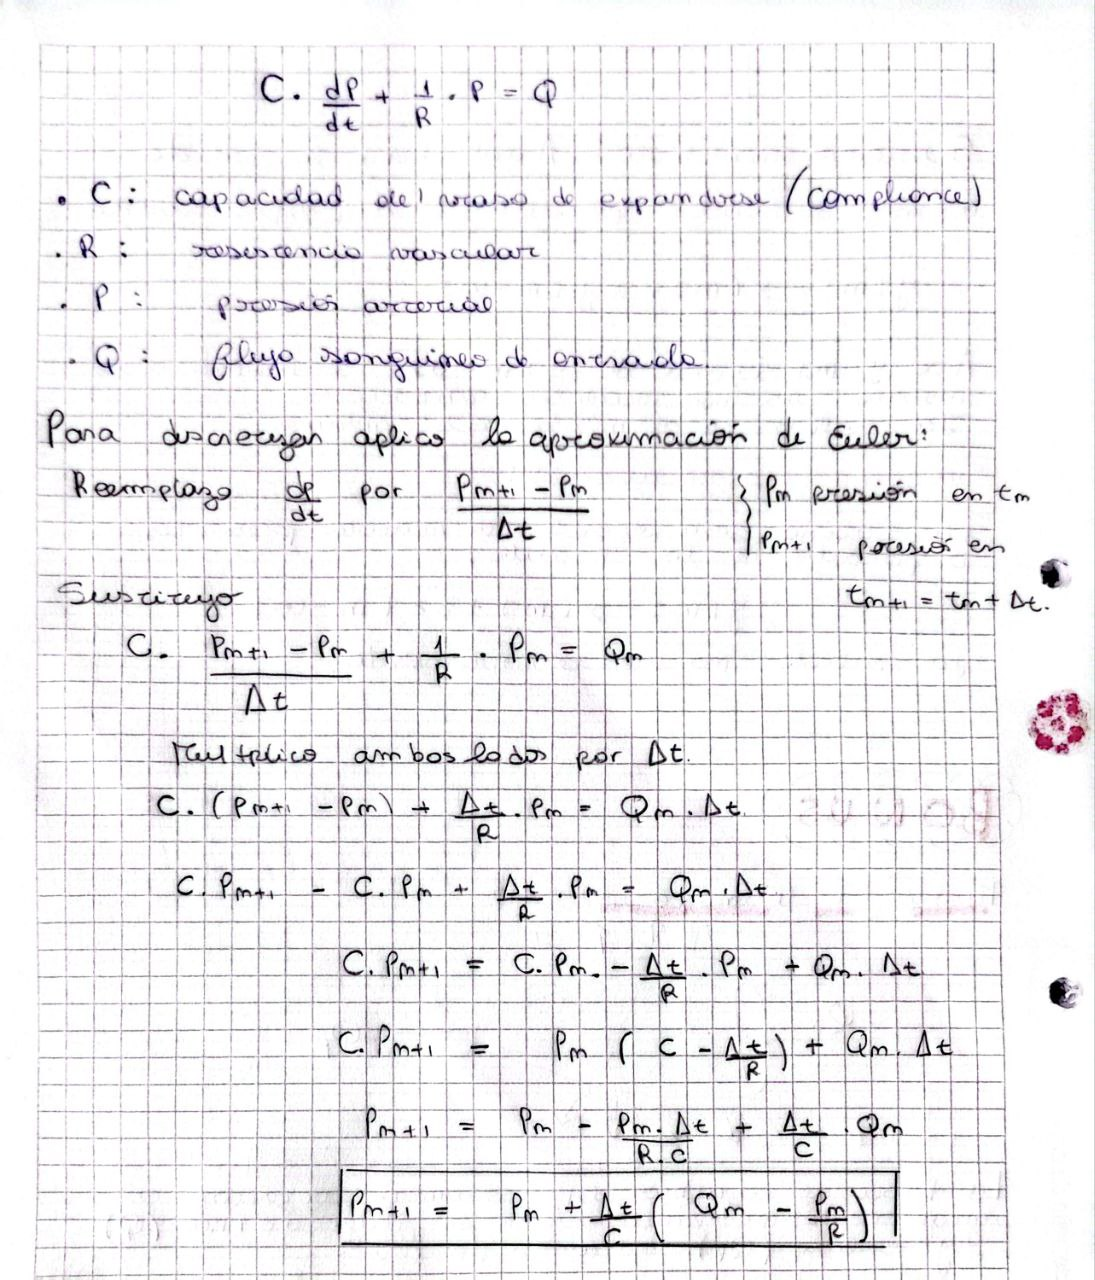

In [8]:
from IPython.display import Image, display
display(Image(filename='C:/Users/noefe/Downloads/imagen3_ts2.jpg'))

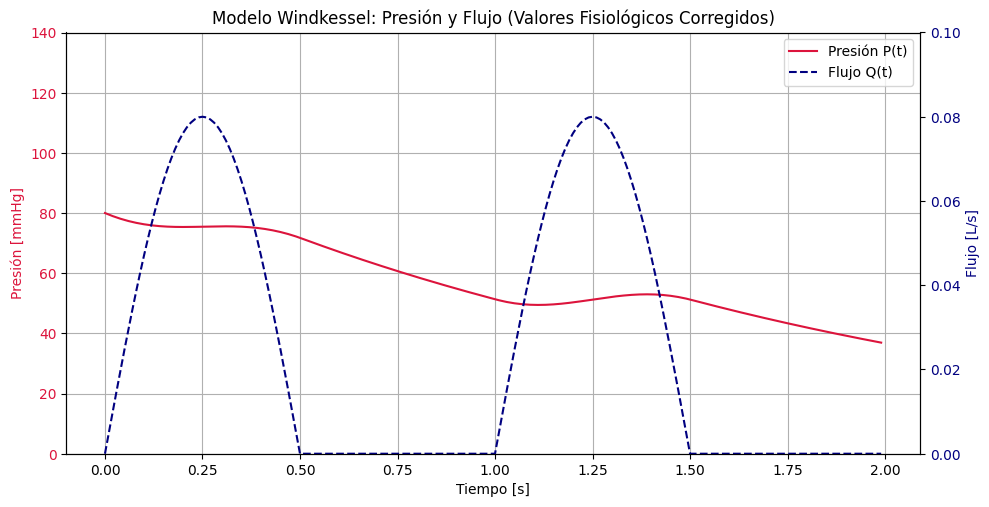

Presión máxima: 80.00 mmHg
Presión mínima: 36.93 mmHg
Flujo máximo: 0.08 L/s


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Valores fisiológicos típicos 
# -----------------------------
C = 1.5e-3    # Compliance [L/mmHg] (1.5 mL/mmHg)
R = 1000.0    # Resistencia vascular [mmHg·s/L] (1000 mmHg·s/L, ~1 mmHg·s/mL)

# -----------------------------
# Parámetros de simulación
# -----------------------------
dt = 0.01     # Paso temporal [s]
T = 2         # Tiempo total de simulación [s]
N = int(T/dt) # Número de pasos
t = np.arange(N) * dt

# -----------------------------
# Flujo de entrada Q(t) (CORREGIDO)
# -----------------------------
f = 1         # frecuencia cardíaca [Hz]
Q_amplitud_pico = 0.08 # Gasto cardíaco pico en L/s (ej: 5 L/min = 0.083 L/s)
Q = Q_amplitud_pico * np.sin(2 * np.pi * f * t) # flujo [L/s]
Q[Q < 0] = 0  # no hay flujo negativo

# -----------------------------
# Inicialización de la presión (presión diastólica basal)
# -----------------------------
P = np.zeros(N)
P[0] = 80 # presión inicial diastólica basal [mmHg] (más realista)

# -----------------------------
# Iteración con método de Euler
# -----------------------------
for n in range(N-1):
    P[n+1] = P[n] + dt/C * (Q[n] - P[n]/R)

# -----------------------------
# Gráfico con eje secundario
# -----------------------------
fig, ax1 = plt.subplots(figsize=(10,5))

# Presión
ax1.plot(t, P, color='crimson', label='Presión P(t)')
ax1.set_xlabel("Tiempo [s]")
ax1.set_ylabel("Presión [mmHg]", color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')
ax1.grid(True)
ax1.set_ylim(0, 140) # Establecer límites Y para la presión arterial

# Flujo en eje secundario
ax2 = ax1.twinx()
ax2.plot(t, Q, color='navy', linestyle='--', label='Flujo Q(t)')
ax2.set_ylabel("Flujo [L/s]", color='navy')
ax2.tick_params(axis='y', labelcolor='navy')
ax2.set_ylim(0, 0.1) # Establecer límites Y para el flujo

# Ajuste de diseño
fig.tight_layout()
plt.title("Modelo Windkessel: Presión y Flujo (Valores Fisiológicos Corregidos)")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

# -----------------------------
# Análisis rápido
# -----------------------------
print(f"Presión máxima: {P.max():.2f} mmHg")
print(f"Presión mínima: {P.min():.2f} mmHg")
print(f"Flujo máximo: {Q.max():.2f} L/s")


**Análisis presión arterial**
La presión comienza en la presión inicial de 80 mmHg.
Cuando el flujo Q(t) aumenta (sístole), la presión aumenta, alcanzando un pico.
Cuando el flujo Q(t) disminuye y se hace cero (diástole), la presión disminuye exponencialmente debido a la descarga de la capacitancia (C) a través de la resistencia (R).
La presión mínima (presión diastólica) se alcanza justo antes del siguiente pulso de flujo.

**Analisis flujo sanguíneo**
El flujo muestra un pulso senoidal que representa la eyección cardíaca.
Tiene una amplitud máxima de aproximadamente 0.08 L/s, que es un valor fisiológico para el gasto cardíaco pico.
El flujo es cero durante la diástole, como se espera fisiológicamente.

**Relación entre Presión y Flujo:**
Se observa claramente cómo la presión responde al flujo. La presión sube con el flujo y luego decae cuando el corazón está en diástole.
El "retraso" y suavizado de la curva de presión respecto a la curva de flujo se debe a la compliance (C), que actúa como un "amortiguador".



### CONCLUSIONES
___

En este trabajo vimos cómo se comportan los sistemas lineales e invariantes en el tiempo (LTI) con diferentes tipos de señales: senoidales, moduladas, cuadradas y pulsos rectangulares. Usando ecuaciones en diferencias y Python, vimos que la salida sigue la frecuencia de la entrada, pero puede cambiar su amplitud y fase, funcionando como un amplificador o como un filtro según los valores que tenga el sistema.

Al calcular la respuesta al impulso, pudimos entender completamente cómo funciona el sistema y usarla para obtener la salida para cualquier señal. Por ejemplo, señales cuadradas o pulsos no salen igual que entran: se ven más suavizadas.

También trabajamos con el modelo de Windkessel, que describe cómo la presión y el flujo de sangre cambian en las arterias. Utilizando la discretización con el método de Euler, simulamos cómo la presión arterial responde a un flujo de entrada pulsátil. Esta simulación demostró que la presión se suaviza y amortigua gracias a la compliancia arterial (la capacidad de las arterias de expandirse y contraerse). El modelo ilustra cómo las arterias no solo transportan sangre, sino que también actúan como un reservorio que almacena y libera energía, convirtiendo un flujo pulsátil en una presión más continua y suave.

## Template

Indicar una opción:

**Resolví la tarea, pero tengo dudas**

Responder:

¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?

**Como funcionan los sistemas LTI**


Indicar si se utilizó IA:

**Sí, usé chatGPT.**

En caso afirmativo, indicar una opción o varias:

**Código**
**Teoría**
